# Madaline Algorithm: MRI

In [1462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1463]:
data = pd.read_csv("Question3.csv") 
data=data.to_numpy()

In [1464]:
# set one
x1 = data[0:99,0]
y1 = data[0:99,1]

# set two
x2 = data[99:199,0]
y2 = data[99:199,1]

## Plotting the Distribution of Data-point

Text(0, 0.5, 'X2')

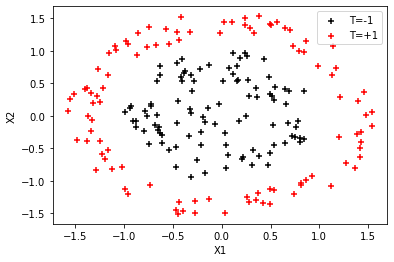

In [1465]:
plt.scatter(x1,y1,c='k',marker='+')
plt.scatter(x2,y2,c='r',marker='+')
plt.legend(["T=-1","T=+1"])
plt.xlabel('X1')
plt.ylabel('X2')

In [1466]:
def Accuracy(y_pred,y_test):
    n_zeros = np.count_nonzero((y_pred-y_test)==0)
    acc=n_zeros/len(y_pred)
    return acc

In [1467]:
def activation_function(z):
    res=[]
    for i in range(len(z)):
        if z[i] >= 0 :
            res.append(1)
        else:
            res.append(-1)
    return res

In [1468]:
def net_function(X,w,bias):
    res=np.dot(w,X)+bias;
    return res

In [1469]:
def init_weights(neuron_Num):
    random_gen1 = np.random.RandomState(10)
    L1_weights = np.random.normal(0,0.01,(neuron_Num,2))
    random_gen2 = np.random.RandomState(20)
    L1_bias    = np.random.normal(0,0.01,neuron_Num)
    return L1_weights,L1_bias

In [1470]:
def Adaline_training(X_train,w1,w2,bias1,bias2,y_train,learning_rate,iteration):
    costs=[]
    for epoch in range(iteration):
        cost=0
        for i in range(len(X_train)):
            z=net_function(X_train[i],w1,bias1)
            y_in=np.dot(w2,activation_function(z))+bias2;
            if y_in >= 0 :
                out_pred=1
            else :
                out_pred=-1   
            errors = y_train[i] - out_pred   
            if errors != 0 and y_train[i]==1 : 
                idx=np.argmin(abs(z))
                p1=learning_rate * X_train[i][0]*(1-z[idx])
                p2=learning_rate * X_train[i][1]*(1-z[idx])
                p=np.zeros((len(w1),2))
                p[idx,0]=p1
                p[idx,1]=p2
                w1 = w1 + p
                bias1[idx] = bias1[idx] + learning_rate*(1-z[idx]) 
            if errors != 0 and y_train[i]==-1 : 
                for i in range(len(z)):
                    if z[i]>0 :
                        p1=learning_rate * X_train[i][0]*(-1-z[i])
                        p2=learning_rate * X_train[i][1]*(-1-z[i])
                        p=np.zeros((len(w1),2))
                        p[i,0]=p1
                        p[i,1]=p2
                        w1 = w1 + p
                        bias1[i] = bias1[i] + learning_rate*(-1-z[i])
            cost = cost+(errors**2)/ 2.0  
        costs.append(cost)
    return w1,bias1,costs

## Training Network & Classifying with Different Number of Neurons

In [1471]:
X_train=data[0:round(1*len(data)),0:2]
y_train=data[0:round(1*len(data)),2]
for i in range (len(y_train)):
    if y_train[i]== 0:
        y_train[i]=-1

### Number of Neurons = 3

In [1472]:
np.random.seed(19)
neuron_Num=3
w1,bias1=init_weights(neuron_Num)
w2=np.zeros((neuron_Num))
w2[0:neuron_Num]=1
bias2=neuron_Num-1
learning_rate=0.01
iteration=200

In [1473]:
trained_w1,trained_b1,costs=Adaline_training(X_train,w1,w2,bias1,bias2,y_train,learning_rate,iteration)

#### Plotting Cost-Function & Separating Lines

Text(0, 0.5, 'value')

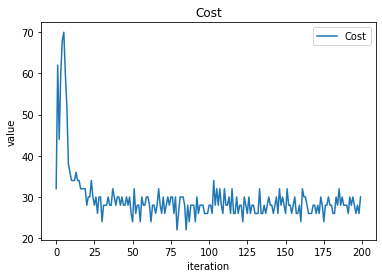

In [1474]:
plt.plot(costs)
plt.title("Cost")
plt.legend(["Cost"])
plt.xlabel('iteration')
plt.ylabel('value')

In [1475]:
domain=[-1.5,-1,0,1,1.5,2]
Line1=[]
Line2=[]
Line3=[]
for i in range (len(domain)):
    Line1.append(-domain[i]*(trained_w1[0][0]/trained_w1[0][1])-trained_b1[0]/trained_w1[0][1])
    Line2.append(-domain[i]*(trained_w1[1][0]/trained_w1[1][1])-trained_b1[1]/trained_w1[1][1])
    Line3.append(-domain[i]*(trained_w1[2][0]/trained_w1[2][1])-trained_b1[2]/trained_w1[2][1])  

(-2.0, 2.0)

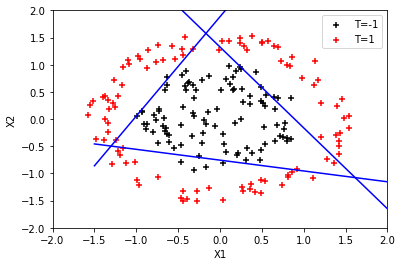

In [1476]:
plt.scatter(x1,y1,c='k',marker='+')
plt.scatter(x2,y2,c='r',marker='+')
plt.legend(["T=-1","T=1"])
plt.plot(domain,Line1,'b')
plt.plot(domain,Line2,'b')
plt.plot(domain,Line3,'b')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim([-2,2])
plt.xlim([-2,2])

### Number of Neurons = 4

In [1477]:
np.random.seed(21)
neuron_Num=4
w1,bias1=init_weights(neuron_Num)
w2=np.zeros((neuron_Num))
w2[0:neuron_Num]=1
bias2=neuron_Num-1
learning_rate=0.01
iteration=200

In [1478]:
trained_w1,trained_b1,costs=Adaline_training(X_train,w1,w2,bias1,bias2,y_train,learning_rate,iteration)

#### Plotting Cost-Function & Separating Lines

Text(0, 0.5, 'value')

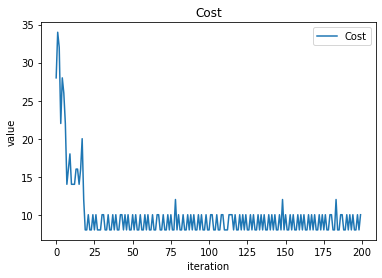

In [1479]:
plt.plot(costs)
plt.title("Cost")
plt.legend(["Cost"])
plt.xlabel('iteration')
plt.ylabel('value')

In [1480]:
domain=[-1.5,-1,0,1,1.5]
Line1=[]
Line2=[]
Line3=[]
Line4=[]
for i in range (len(domain)):
    Line1.append(-domain[i]*(trained_w1[0][0]/trained_w1[0][1])-trained_b1[0]/trained_w1[0][1])
    Line2.append(-domain[i]*(trained_w1[1][0]/trained_w1[1][1])-trained_b1[1]/trained_w1[1][1])
    Line3.append(-domain[i]*(trained_w1[2][0]/trained_w1[2][1])-trained_b1[2]/trained_w1[2][1])
    Line4.append(-domain[i]*(trained_w1[3][0]/trained_w1[3][1])-trained_b1[3]/trained_w1[3][1])

(-2.0, 2.0)

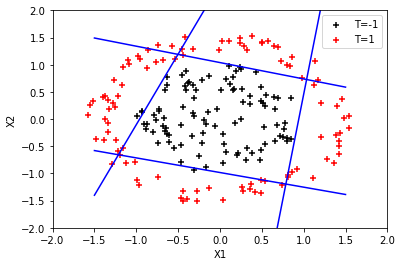

In [1481]:
plt.scatter(x1,y1,c='k',marker='+')
plt.scatter(x2,y2,c='r',marker='+')
plt.legend(["T=-1","T=1"])
plt.plot(domain,Line1,'b')
plt.plot(domain,Line2,'b')
plt.plot(domain,Line3,'b')
plt.plot(domain,Line4,'b')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim([-2,2])
plt.xlim([-2,2])

### Number of Neurons = 8

In [1487]:
np.random.seed(21)
neuron_Num=8
w1,bias1=init_weights(neuron_Num)
w2=np.zeros((neuron_Num))
w2[0:neuron_Num]=1
bias2=neuron_Num-1
learning_rate=0.001
iteration=200

In [1488]:
trained_w1,trained_b1,costs=Adaline_training(X_train,w1,w2,bias1,bias2,y_train,learning_rate,iteration)

#### Plotting Cost-Function & Separating Lines

Text(0, 0.5, 'value')

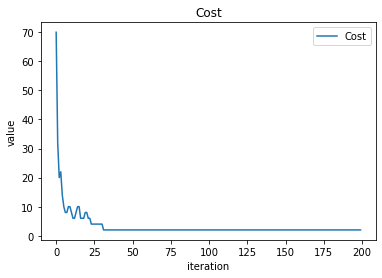

In [1489]:
plt.plot(costs)
plt.title("Cost")
plt.legend(["Cost"])
plt.xlabel('iteration')
plt.ylabel('value')

In [1490]:
domain=[-1.5,-1,0,1,1.5]
Line1=[]
Line2=[]
Line3=[]
Line4=[]
Line5=[]
Line6=[]
Line7=[]
Line8=[]

for i in range (len(domain)):
    Line1.append(-domain[i]*(trained_w1[0][0]/trained_w1[0][1])-trained_b1[0]/trained_w1[0][1])
    Line2.append(-domain[i]*(trained_w1[1][0]/trained_w1[1][1])-trained_b1[1]/trained_w1[1][1])
    Line3.append(-domain[i]*(trained_w1[2][0]/trained_w1[2][1])-trained_b1[2]/trained_w1[2][1])
    Line4.append(-domain[i]*(trained_w1[3][0]/trained_w1[3][1])-trained_b1[3]/trained_w1[3][1])
    Line5.append(-domain[i]*(trained_w1[4][0]/trained_w1[4][1])-trained_b1[4]/trained_w1[4][1])
    Line6.append(-domain[i]*(trained_w1[5][0]/trained_w1[5][1])-trained_b1[5]/trained_w1[5][1])
    Line7.append(-domain[i]*(trained_w1[6][0]/trained_w1[6][1])-trained_b1[6]/trained_w1[6][1])
    Line8.append(-domain[i]*(trained_w1[7][0]/trained_w1[7][1])-trained_b1[7]/trained_w1[7][1])

(-2.0, 2.0)

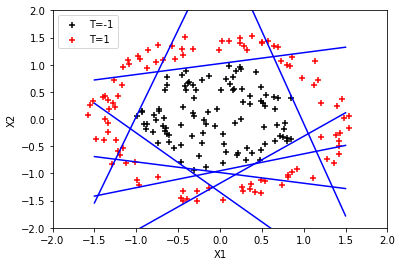

In [1491]:
plt.scatter(x1,y1,c='k',marker='+')
plt.scatter(x2,y2,c='r',marker='+')
plt.legend(["T=-1","T=1"])
plt.plot(domain,Line1,'b')
plt.plot(domain,Line2,'b')
plt.plot(domain,Line3,'b')
plt.plot(domain,Line4,'b')
plt.plot(domain,Line5,'b')
plt.plot(domain,Line6,'b')
plt.plot(domain,Line7,'b')
plt.plot(domain,Line8,'b')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim([-2,2])
plt.xlim([-2,2])